In [1]:
from large_gcs.graph_generators.contact_graph_generator import (
    ContactGraphGeneratorParams,
    ContactGraphGenerator,
)
from large_gcs.graph.contact_graph import ContactGraph
from large_gcs.algorithms.gcs_astar_convex_restriction import GcsAstarConvexRestriction
from large_gcs.graph.contact_cost_constraint_factory import (
    contact_shortcut_edge_cost_factory_over_obj_weighted,
)

import numpy as np

np.set_printoptions(formatter={"float": lambda x: "{0:0.3f}".format(x)})
import logging

logging.basicConfig(level=logging.INFO)

In [2]:
# cg = ContactGraph.load_from_file(
#     ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2")
# )

In [3]:
vertex_inclusion = [
    "source",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')",
    "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')",
    "('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
    "('IC|obs0_v0-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')",
    "('IC|obs0_v0-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f0-rob0_v1')",
    "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_v0-rob0_f0')",
    "('NC|obs0_f2-obj0_v1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f3-rob0_v0')",
    "('NC|obs0_f2-obj0_v1', 'NC|obs0_f1-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f2-rob0_f2')",
    "target",
]

# for i in range(len(vertex_inclusion) - 1):
#     has_edge_to_next_vertex = any(
#         edge.v == vertex_inclusion[i + 1]
#         for edge in cg.outgoing_edges(vertex_inclusion[i])
#     )
#     print(
#         f"{vertex_inclusion[i]} -> {vertex_inclusion[i+1]}: {has_edge_to_next_vertex}"
#     )

In [4]:
cg_sol_only = ContactGraph.load_from_file(
    ContactGraphGeneratorParams.graph_file_path_from_name("cg_maze_a2"),
    vertex_inclusion=vertex_inclusion,
)
cg_sol_only.set_target(vertex_inclusion[-1])
cg_sol_only.workspace = [[-4, 4], [-5, 3]]

INFO:large_gcs.graph.contact_graph:Loading 35 contact pair modes for 4 bodies...
INFO:large_gcs.graph.contact_graph:Generating contact sets for 1234 sets...
100%|██████████| 1234/1234 [00:02<00:00, 543.40it/s]
INFO:large_gcs.graph.contact_graph:Filtering sets for inclusion strings ['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f1',

In [5]:
# cg_sol_only.graphviz()

In [6]:
active_edges = []
for i in range(len(vertex_inclusion) - 1):
    active_edges.append(
        cg_sol_only.edges[(vertex_inclusion[i], vertex_inclusion[i + 1])]
    )
# sol = cg_sol_only.solve_convex_restriction(active_edges)
sol = cg_sol_only.solve(use_convex_relaxation=False)
print(sol.vertex_path)
print(sol.cost)
print(sol.time)

INFO:drake:Solved GCS shortest path using Mosek with convex_relaxation=false and preprocessing=false and no rounding.


['source', "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f1-rob0_v2', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'NC|obj0_f1-rob0_f1')", "('NC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_f0-obj0_v3', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f2-rob0_v0', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f2', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'IC|obj0_f1-rob0_f1')", "('IC|obs0_v0-obj0_f1', 'NC|obs0_f0-rob0_v1', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')", "('IC|obs0_v0-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_f0-rob0_v1', 'NC|obj0_f0-rob0_v1')", "('IC|obs0_v0-obj0_f1', 'NC|obs0_f2-rob0_v0', 'NC|obs1_f2-obj0_v1', 'NC|obs1_

In [7]:
contact_sol = cg_sol_only.contact_spp_sol

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y /tmp/tmpokc106_z/temp.m4v


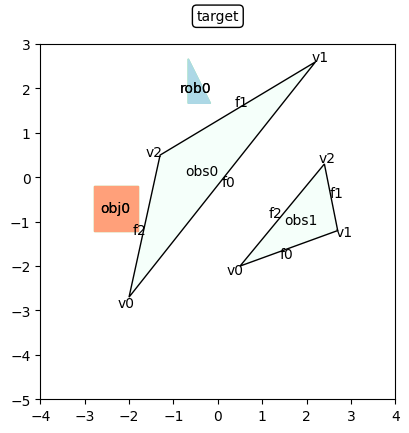

In [8]:
from IPython.display import HTML

anim = cg_sol_only.animate_solution()
# save as mp4
HTML(anim.to_html5_video())

In [9]:
anim.save("cg_maze_a2_manual.mp4")

INFO:matplotlib.animation:Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
INFO:matplotlib.animation:MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 640x480 -pix_fmt rgba -r 20.0 -loglevel error -i pipe: -vcodec h264 -pix_fmt yuv420p -y cg_maze_a2_manual.mp4
